In [1]:
# housekeeping
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display

# Enable inline plotting
%matplotlib inline

In [10]:
# read data and do sanity check

train_df = pd.read_json('../data/train.json')
train_df.info()
display(train_df.head())
display(train_df.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39774 entries, 0 to 39773
Data columns (total 3 columns):
cuisine        39774 non-null object
id             39774 non-null int64
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


,cuisine,id,ingredients
39769,irish,29109,"[light brown sugar, granulated sugar, butter, ..."
39770,italian,11462,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,irish,2238,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,chinese,41882,"[boneless chicken skinless thigh, minced garli..."
39773,mexican,2362,"[green chile, jalapeno chilies, onions, ground..."


In [11]:
# list unique cusines
print "There are " + str( len(train_df.cuisine.unique())) + " cuisines in the train dataset" 
print "They are:"
print train_df.cuisine.unique()

There are 20 cuisines in the train dataset
They are:
[u'greek' u'southern_us' u'filipino' u'indian' u'jamaican' u'spanish'
 u'italian' u'mexican' u'chinese' u'british' u'thai' u'vietnamese'
 u'cajun_creole' u'brazilian' u'french' u'japanese' u'irish' u'korean'
 u'moroccan' u'russian']


,id
cuisine,
brazilian,467
russian,489
jamaican,526
irish,667
filipino,755
british,804
moroccan,821
vietnamese,825
korean,830


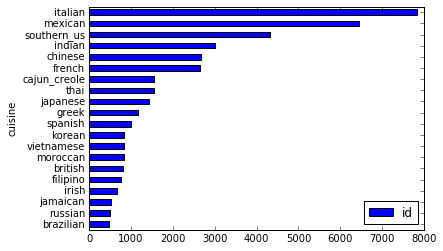

In [12]:
# How many times each unique cusine is occuring in the training data set
dfsubset = train_df.loc[:,('cuisine','id')]
dfsubset.groupby('cuisine').count().sort_values('id').plot.barh(stacked = True)
cuisines = dfsubset.groupby('cuisine')
cuisines.count().sort_values('id')

In [16]:
# Calculate num of ingrideints for every recipe and add it as a new column
train_df['NumbOfIngridients'] = train_df['ingredients'].apply(lambda x: len(x))
display(train_df.head())
display(train_df.tail())

,cuisine,id,ingredients,NumbOfIngridients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,indian,22213,"[water, vegetable oil, wheat, salt]",4
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",20


,cuisine,id,ingredients,NumbOfIngridients
39769,irish,29109,"[light brown sugar, granulated sugar, butter, ...",12
39770,italian,11462,"[KRAFT Zesty Italian Dressing, purple onion, b...",7
39771,irish,2238,"[eggs, citrus fruit, raisins, sourdough starte...",12
39772,chinese,41882,"[boneless chicken skinless thigh, minced garli...",21
39773,mexican,2362,"[green chile, jalapeno chilies, onions, ground...",12


In [17]:
# check simple statistic values for NumberOfIngridients
train_df.describe()

,id,NumbOfIngridients
count,39774.000000,39774.000000
mean,24849.536959,10.767713
std,14360.035505,4.428978
min,0.000000,1.000000
25%,12398.250000,8.000000
50%,24887.000000,10.000000
75%,37328.500000,13.000000
max,49717.000000,65.000000


In [18]:
# check simple statistical values for NumberOfIngridients for each cuisine
dfsubset = train_df.loc[:,('cuisine','NumbOfIngridients')]
groupBy = dfsubset.groupby('cuisine')
groupBy['NumbOfIngridients'].agg([np.min, np.mean, np.max])

,amin,mean,amax
cuisine,,,
brazilian,2,9.520343,59
british,2,9.708955,30
cajun_creole,2,12.617076,31
chinese,2,11.982791,38
filipino,2,10.000000,38
french,1,9.817838,31
greek,1,10.182128,27
indian,1,12.705961,49
irish,2,9.299850,27


In [19]:
# Look for only recipies that have less than 1-2-3 ingridients
train_df[train_df.NumbOfIngridients == 1]

,cuisine,id,ingredients,NumbOfIngridients
940,japanese,4734,[sushi rice],1
2088,vietnamese,7833,[dried rice noodles],1
6787,indian,36818,[plain low-fat yogurt],1
7011,indian,19772,[unsalted butter],1
8181,japanese,16116,[udon],1
8852,thai,29738,[sticky rice],1
8990,indian,41124,[butter],1
10506,mexican,32631,[corn tortillas],1
13178,thai,29570,[grained],1
17804,southern_us,29849,[lemonade concentrate],1


In [9]:


# get unique ingridients for recipies that have 1-2-3 ingr per cuisine

# get number of unique ingridients per cuisine

# get ingridients that occurs only in 1 or 2 cuisines

# text analyzing: similar ingridient / different spelling

# get ingridients that occur in all cuisines

